In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
customers=pd.read_csv(r"C:\Users\khush\Downloads\large_customers.csv")
payments=pd.read_csv(r"C:\Users\khush\Downloads\large_payments.csv")
orders=pd.read_csv(r"C:\Users\khush\Downloads\large_orders.csv")
order_items=pd.read_csv(r"C:\Users\khush\Downloads\large_order_items.csv")
products=pd.read_csv(r"C:\Users\khush\Downloads\large_products.csv")

In [38]:
len(customers)

1000

In [39]:
len(payments)

2886

In [40]:
len(orders)

3000

In [41]:
len(order_items)

10000

In [42]:
len(products)

100

In [43]:
customers.info

<bound method DataFrame.info of      customer_id  customer_name region
0              1     Customer_1  South
1              2     Customer_2   West
2              3     Customer_3  South
3              4     Customer_4  North
4              5     Customer_5  North
..           ...            ...    ...
995          996   Customer_996   East
996          997   Customer_997   West
997          998   Customer_998  South
998          999   Customer_999   West
999         1000  Customer_1000  South

[1000 rows x 3 columns]>

In [44]:
payments.info

<bound method DataFrame.info of       order_id  payment_value
0            2       16078.77
1            3       47643.19
2            4       32466.59
3            5       12899.97
4            6        5751.73
...        ...            ...
2881      2996       49132.51
2882      2997       14387.39
2883      2998       41763.48
2884      2999        4673.28
2885      3000       30339.43

[2886 rows x 2 columns]>

In [45]:
order_items

,order_id,product_id,quantity,price,total_amount
0,2499,67,1,2922.79,2922.79
1,2763,67,3,2922.79,8768.37
2,189,67,3,2922.79,8768.37
3,308,67,3,2922.79,8768.37
4,2943,67,1,2922.79,2922.79
...,...,...,...,...,...
9995,2378,4,4,3870.06,15480.24
9996,1752,4,1,3870.06,3870.06
9997,1351,4,2,3870.06,7740.12
9998,2175,4,1,3870.06,3870.06


In [46]:
orders.info

<bound method DataFrame.info of       order_id  customer_id  order_date
0            1          798  2024-01-20
1            2          857  2024-06-10
2            3          746  2024-06-12
3            4           65  2024-01-08
4            5          683  2024-03-15
...        ...          ...         ...
2995      2996          873  2024-06-02
2996      2997          715  2024-06-23
2997      2998          362  2024-05-12
2998      2999          596  2024-04-02
2999      3000          401  2024-02-07

[3000 rows x 3 columns]>

In [47]:
products.info

<bound method DataFrame.info of     product_id product_name     category    price
0            1    Product_1     Clothing  3908.48
1            2    Product_2  Electronics  1087.64
2            3    Product_3  Electronics  4387.06
3            4    Product_4         Home  3870.06
4            5    Product_5  Electronics  3544.71
..         ...          ...          ...      ...
95          96   Product_96         Home  3327.08
96          97   Product_97        Books  1181.20
97          98   Product_98     Clothing  4862.59
98          99   Product_99        Books  1870.04
99         100  Product_100         Toys  4074.65

[100 rows x 4 columns]>

### Top 10 Products Sale By Quantity

In [48]:
top = order_items.groupby('product_id')['quantity'].sum().reset_index()
top

,product_id,quantity
0,1,232
1,2,245
2,3,254
3,4,261
4,5,240
...,...,...
95,96,255
96,97,254
97,98,252
98,99,223


In [49]:
top=top.sort_values(by='quantity',ascending=False).reset_index(drop=True)[:10]

In [50]:
top

,product_id,quantity
0,77,312
1,17,308
2,69,305
3,46,304
4,29,298
5,20,294
6,47,293
7,78,283
8,9,282
9,11,281


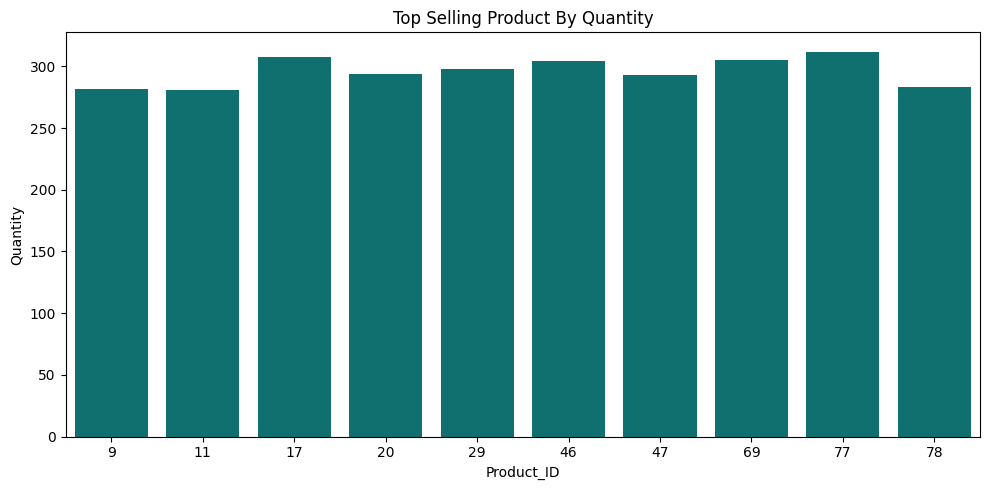

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(x='product_id',y='quantity',data=top,color='teal')
plt.title('Top Selling Product By Quantity')
plt.ylabel('Quantity')
plt.xlabel('Product_ID')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Top 10 Order ID By Total Amount

In [52]:
k = order_items.groupby('order_id')['total_amount'].sum().reset_index(drop=False)


In [53]:
k = k.sort_values(by='total_amount', ascending=False).reset_index(drop=True)[:10]
k

,order_id,total_amount
0,404,100155.12
1,1918,92864.10
2,1656,89760.55
3,2071,89222.38
4,1831,88871.35
5,376,85846.31
6,2257,85171.45
7,1052,85074.78
8,336,85012.99
9,2403,80054.60


<function matplotlib.pyplot.show(close=None, block=None)>

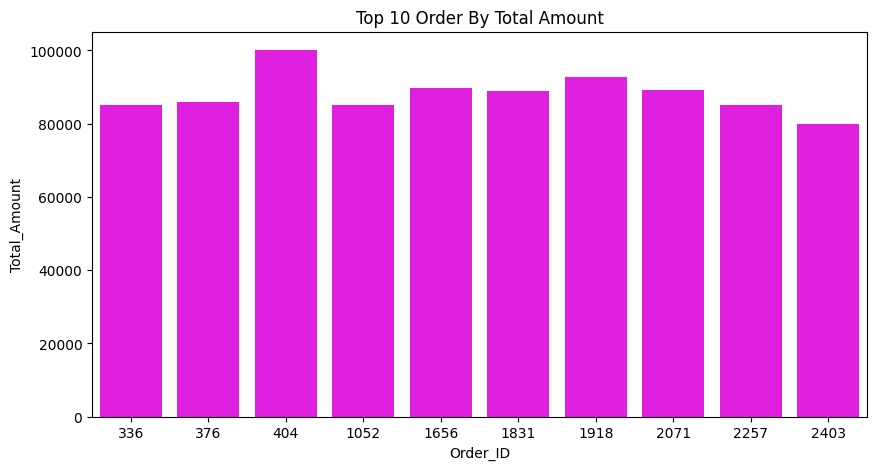

In [54]:
plt.figure(figsize=(10,5))
sns.barplot(x='order_id',y='total_amount',data=k,color='magenta')
plt.title('Top 10 Order By Total Amount')
plt.xlabel('Order_ID')
plt.ylabel('Total_Amount')
plt.xticks(rotation=0)
plt.show

### Revenue by region wise

In [55]:
revenue = pd.merge(customers, payments, left_on='customer_id', right_on='order_id')

In [56]:
revenue.groupby('region')['payment_value'].sum().reset_index(drop=False)

,region,payment_value
0,East,5727380.96
1,North,6309431.59
2,South,6303063.84
3,West,6350908.40


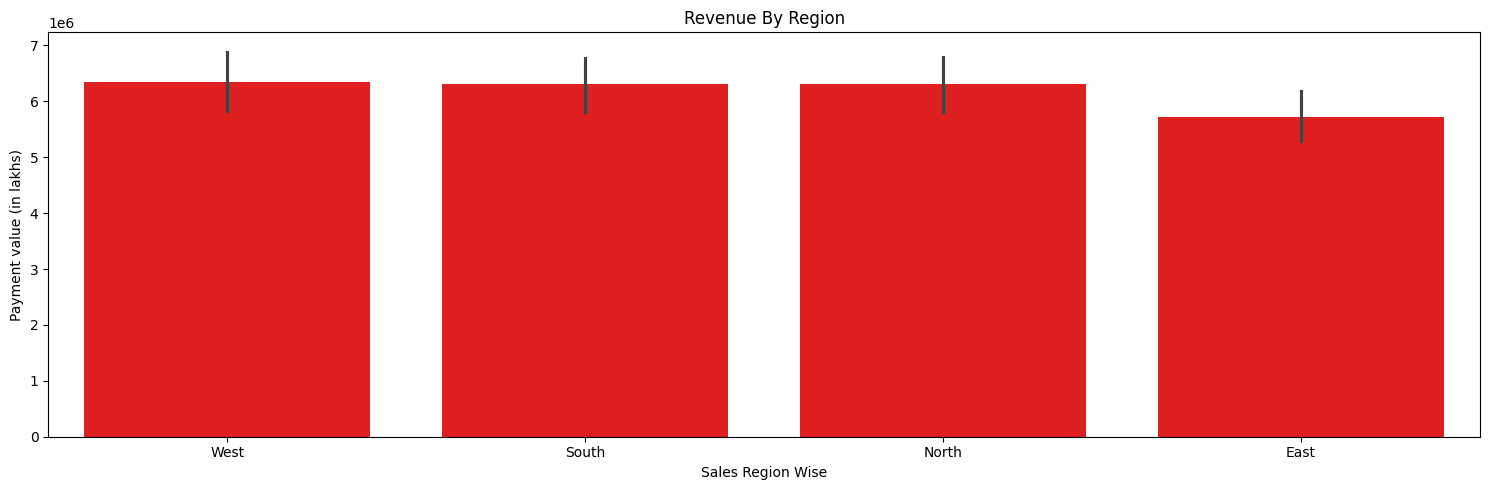

In [66]:
plt.figure(figsize=(15,5))
sns.barplot(x='region',y='payment_value',data=revenue,estimator=sum,color='red')
plt.title('Revenue By Region')
plt.ylabel('Payment value (in lakhs)')
plt.xlabel('Sales Region Wise')
plt.tight_layout()
plt.show()

### Revenue  By Category Wise

In [58]:
category = pd.merge(products, payments, left_on='product_id',right_on='order_id')

In [59]:
category

,product_id,product_name,category,price,order_id,payment_value
0,2,Product_2,Electronics,1087.64,2,16078.77
1,3,Product_3,Electronics,4387.06,3,47643.19
2,4,Product_4,Home,3870.06,4,32466.59
3,5,Product_5,Electronics,3544.71,5,12899.97
4,6,Product_6,Clothing,1957.44,6,5751.73
...,...,...,...,...,...,...
91,96,Product_96,Home,3327.08,96,46658.91
92,97,Product_97,Books,1181.20,97,39684.69
93,98,Product_98,Clothing,4862.59,98,17886.68
94,99,Product_99,Books,1870.04,99,30960.61


In [60]:
k=category.groupby('category')['payment_value'].sum().reset_index(drop=False)

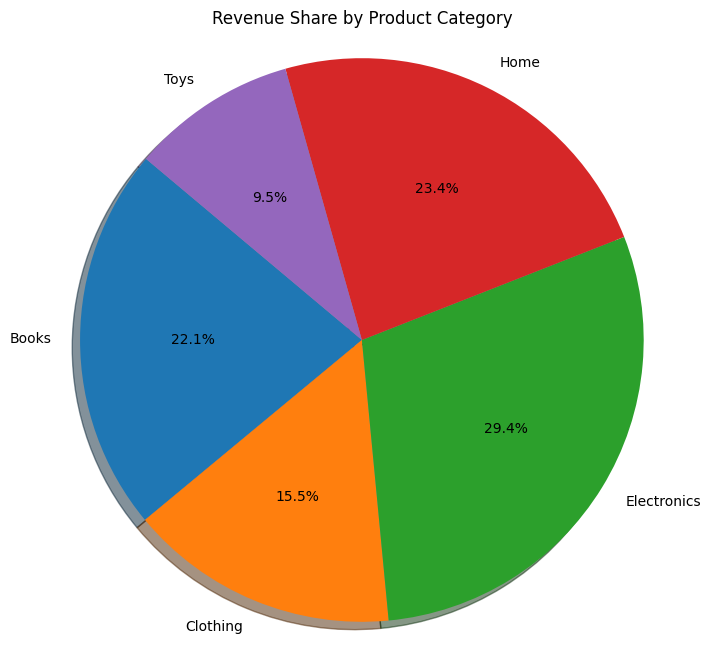

In [61]:
plt.figure(figsize=(8,8))
plt.pie(k['payment_value'], 
        labels=k['category'], 
        autopct='%1.1f%%', 
        startangle=140,
        shadow=True)

plt.title("Revenue Share by Product Category")
plt.axis('equal')  
plt.show()


### TOP 10 Customers by payment

In [62]:
r=pd.merge(customers, payments, left_on='customer_id', right_on='order_id' )

In [63]:
r.groupby('customer_id')['payment_value'].sum().reset_index(drop=False)

,customer_id,payment_value
0,2,16078.77
1,3,47643.19
2,4,32466.59
3,5,12899.97
4,6,5751.73
...,...,...
952,996,13996.72
953,997,17299.12
954,998,28370.75
955,999,22192.59


In [64]:
r=r.sort_values(by='payment_value',ascending=False).reset_index(drop=False)[:10]
r

,index,customer_id,customer_name,region,order_id,payment_value
0,385,404,Customer_404,South,404,100155.12
1,359,376,Customer_376,West,376,85846.31
2,322,336,Customer_336,West,336,85012.99
3,499,523,Customer_523,South,523,79386.83
4,16,18,Customer_18,West,18,78005.69
5,679,711,Customer_711,North,711,76766.03
6,889,928,Customer_928,North,928,76699.86
7,654,683,Customer_683,North,683,76048.92
8,649,678,Customer_678,North,678,75825.14
9,790,826,Customer_826,West,826,75706.09


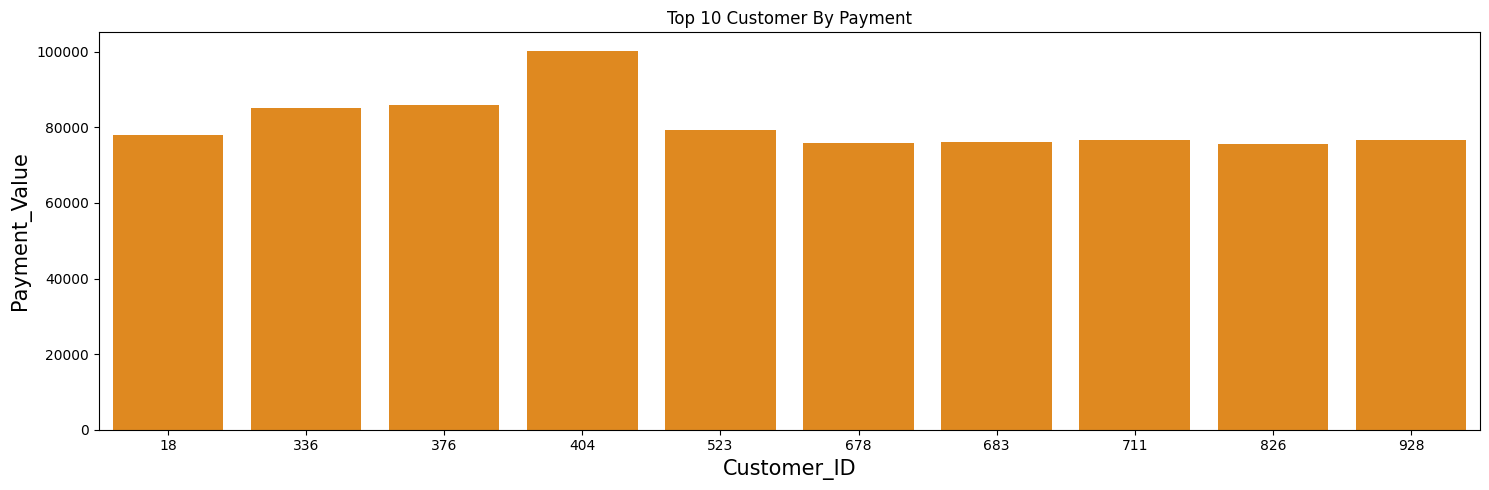

In [67]:
plt.figure(figsize=(15,5))
sns.barplot(y='payment_value',x='customer_id',data=r,color='darkorange')
plt.title('Top 10 Customer By Payment')
plt.xlabel('Customer_ID',fontsize=15)
plt.ylabel('Payment_Value',fontsize=15)
plt.tight_layout()
plt.show()